In [5]:
#Q1.Implement convolution operation for a sample image of shape 
#(H=6, W=6, C=1) 
#random kernel of size (3,3) using torch.nn.functional.conv2d.
#What is the dimension of the output image? Apply, various values
#for parameter stride=1 and note the change in the dimension of the 
#output image. Arrive at an equation for the output image size 
#with respect to the kernel size and stride and verify your answer with
#code. Now, repeat the exercise by changing padding parameter. Obtain a
#formula using kernel, stride, and padding to get the output image size. What is the total number of
#parameters in your network? Verify with code
import torch
import torch.nn.functional as F

image = torch.rand(6 ,6)
print("image=", image)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
print("image=", image)
kernel = torch.ones(3 ,3)
# kernel = torch.rand(3,3)
print("kernel=", kernel)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)

def out_dim(in_shape ,stride ,padding ,kernel_shape):
    out_shape = [0 for i in range(4)]
    for dim in range(len(in_shape)):
        out_shape[dim] = (in_shape[dim] + 2* padding - kernel_shape[dim]) // stride + 1
    return out_shape


# Stride 1 Padding 0
outimage = F.conv2d(image, kernel, stride=1, padding=0)
print("outimage=", outimage)
print("Dimension of output image S-1 P-0: ", outimage.shape)
print("Manually dim of output S-1 P-0: ", out_dim(image.shape, 1, 0, kernel.shape))

# Stride 1 Padding 1
outimage = F.conv2d(image, kernel, stride=1, padding=1)
print("Dimension of output image S-1 P-1:", outimage.shape)
print("Manually dim of output S-1 P-1: ", out_dim(image.shape, 1, 1, kernel.shape))


outimage = F.conv2d(image, kernel, stride=1, padding=2)
print("Dimension of output image S-1 P-2:", outimage.shape)
print("Manually dim of output S-1 P-2: ", out_dim(image.shape, 1, 2, kernel.shape))

outimage = F.conv2d(image, kernel, stride=2, padding=1)
print("Dimension of output image S-2 P-1: ", outimage.shape)
print("Manually dim of output S-2 P-1: ", out_dim(image.shape, 2, 1, kernel.shape))


outimage = F.conv2d(image, kernel, stride=3, padding=1)
print("Dimension of output image S-2 P-1:", outimage.shape)
print("Manually dim of output S-3 P-1: ", out_dim(image.shape, 3, 1, kernel.shape))

print("Number of Learnable Parameters = 9")


image= tensor([[0.7461, 0.6721, 0.8542, 0.2826, 0.7442, 0.8605],
        [0.5673, 0.2782, 0.0783, 0.5983, 0.4777, 0.9749],
        [0.1545, 0.7108, 0.1644, 0.8373, 0.3911, 0.5079],
        [0.8915, 0.0858, 0.7318, 0.9474, 0.6203, 0.3669],
        [0.3660, 0.0063, 0.7533, 0.8870, 0.7475, 0.4578],
        [0.6850, 0.8066, 0.5021, 0.0230, 0.3264, 0.9035]])
image.shape= torch.Size([1, 6, 6])
image.shape= torch.Size([1, 1, 6, 6])
image= tensor([[[[0.7461, 0.6721, 0.8542, 0.2826, 0.7442, 0.8605],
          [0.5673, 0.2782, 0.0783, 0.5983, 0.4777, 0.9749],
          [0.1545, 0.7108, 0.1644, 0.8373, 0.3911, 0.5079],
          [0.8915, 0.0858, 0.7318, 0.9474, 0.6203, 0.3669],
          [0.3660, 0.0063, 0.7533, 0.8870, 0.7475, 0.4578],
          [0.6850, 0.8066, 0.5021, 0.0230, 0.3264, 0.9035]]]])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
outimage= tensor([[[[4.2259, 4.4764, 4.4282, 5.6746],
          [3.6626, 4.4324, 4.8467, 5.7219],
          [3.8643, 5.1241, 6

In [2]:
#Q2.Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3
#and observe the output. Implement the equivalent of torch.nn.Conv2d 
#using the torch.nn.functional.conv2D to get the same output. You may 
#ignore bias.
import torch.nn as nn
import torch

image= torch.tensor([[[[0.2557, 0.9236, 0.4913, 0.3200, 0.4958, 0.2214],
          [0.7554, 0.6501, 0.0107, 0.8675, 0.5163, 0.6102],
          [0.8228, 0.1919, 0.8724, 0.8043, 0.3882, 0.9689],
          [0.4894, 0.5116, 0.5624, 0.6949, 0.6289, 0.9802],
          [0.3913, 0.2773, 0.1427, 0.3717, 0.4154, 0.3669],
          [0.8327, 0.8157, 0.7192, 0.9387, 0.4569, 0.6776]]]])

conv = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,stride=1,padding=0,bias=False)
print("Kernel parameters for 3 channels: ")
kernel = conv.weight
print(conv.weight)
print("Output image using torch.nn.Conv2d: ")
out_image = print(conv(image))

import torch.nn.functional as F
out_image = F.conv2d(image,kernel,stride=1,padding=0)
print("Output image using torch.nn.functional.conv2d: ")
print(out_image)

Kernel parameters for 3 channels: 
Parameter containing:
tensor([[[[ 0.2279, -0.2874, -0.1759],
          [ 0.3103, -0.1185, -0.1584],
          [ 0.1633, -0.0726, -0.0806]]],


        [[[-0.0119, -0.3153,  0.1821],
          [-0.2524,  0.3068, -0.0159],
          [ 0.2148,  0.0408, -0.2017]]],


        [[[ 0.3194, -0.0162,  0.2061],
          [-0.1416,  0.1636, -0.0164],
          [ 0.2193,  0.0366, -0.1043]]]], requires_grad=True)
Output image using torch.nn.Conv2d: 
tensor([[[[-0.0877, -0.0207, -0.1956,  0.0279],
          [ 0.0753, -0.1920, -0.2330, -0.0190],
          [ 0.0134, -0.3614, -0.1451, -0.1118],
          [-0.0496, -0.1516, -0.2352, -0.1212]],

         [[-0.1876, -0.3676,  0.3807, -0.1969],
          [-0.3622,  0.3459, -0.1370, -0.1841],
          [ 0.1796, -0.1081, -0.1700,  0.0692],
          [-0.0136, -0.0738,  0.0608,  0.0833]],

         [[ 0.2636,  0.2386,  0.5661,  0.1810],
          [ 0.2010,  0.5489,  0.1806,  0.4014],
          [ 0.5257,  0.2484,  0.3710,  0

In [3]:
#Q3Implement CNN for classifying digits in MNIST dataset using PyTorch. 
#Display the classification accuracy in the form of a Confusion matrix.
#Verify the number of learnable
#parameters in the model.
#Training a CNN on an image dataset is similar to 
#training a basic multi-layer feed-forward
#network on numerical data as outlined below.
#Define model architecture
#Load dataset from disk
#Loop over epochs and batches
#Make predictions and compute loss
#Properly zero our gradient, perform backpropagation, 
#and update model parameters
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader


class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1, 64, 3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2, 2), stride=2),
                                 nn.Conv2d(64, 128, 3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2, 2), stride=2),
                                 nn.Conv2d(128, 64, 3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2, 2), stride=2),
                                 )
        self.classification_head = nn.Sequential(nn.Linear(64, 20, bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20, 10, bias=True), )

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size, -1))


mnist_trainset = datasets.MNIST(root="./data", download=True, train=True, transform=ToTensor())
train_loader = DataLoader(mnist_trainset, batch_size=50, shuffle=True)
mnist_testset = datasets.MNIST(root="./data", download=True, train=False, transform=ToTensor())
test_loader = DataLoader(mnist_testset, batch_size=50, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
batch_size = 50

total_params = 0
for name, param in model.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

correct, total = 0, 0
for i, vdata in enumerate(test_loader):
    tinputs, tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)

    _, predicted = torch.max(toutputs, 1)
    total += tlabels.size(0)
    correct += (predicted == tlabels).sum()

print(f"Correct = {correct}, Total = {total}")

100.0%
100.0%
100.0%
100.0%


[1,   100] loss: 2.312
[1,   200] loss: 2.303
[1,   300] loss: 2.295
[1,   400] loss: 2.283
[1,   500] loss: 2.267
[1,   600] loss: 2.240
[1,   700] loss: 2.188
[1,   800] loss: 2.047
[1,   900] loss: 1.732
[1,  1000] loss: 1.293
[1,  1100] loss: 1.051
[1,  1200] loss: 0.829
[2,   100] loss: 0.700
[2,   200] loss: 0.599
[2,   300] loss: 0.523
[2,   400] loss: 0.477
[2,   500] loss: 0.423
[2,   600] loss: 0.396
[2,   700] loss: 0.363
[2,   800] loss: 0.354
[2,   900] loss: 0.314
[2,  1000] loss: 0.295
[2,  1100] loss: 0.300
[2,  1200] loss: 0.289
[3,   100] loss: 0.265
[3,   200] loss: 0.264
[3,   300] loss: 0.246
[3,   400] loss: 0.253
[3,   500] loss: 0.225
[3,   600] loss: 0.216
[3,   700] loss: 0.222
[3,   800] loss: 0.214
[3,   900] loss: 0.220
[3,  1000] loss: 0.217
[3,  1100] loss: 0.200
[3,  1200] loss: 0.210
[4,   100] loss: 0.199
[4,   200] loss: 0.200
[4,   300] loss: 0.184
[4,   400] loss: 0.186
[4,   500] loss: 0.162
[4,   600] loss: 0.191
[4,   700] loss: 0.166
[4,   800] 

Training CNNClassifier1:
[1, 100] loss: 2.307
[1, 200] loss: 2.303
[1, 300] loss: 2.297
[1, 400] loss: 2.294
[1, 500] loss: 2.290
[1, 600] loss: 2.286
[1, 700] loss: 2.278
[1, 800] loss: 2.270
[1, 900] loss: 2.253
[1, 1000] loss: 2.229
[1, 1100] loss: 2.169
[1, 1200] loss: 2.034
[2, 100] loss: 1.810
[2, 200] loss: 1.506
[2, 300] loss: 1.261
[2, 400] loss: 1.018
[2, 500] loss: 0.850
[2, 600] loss: 0.754
[2, 700] loss: 0.651
[2, 800] loss: 0.579
[2, 900] loss: 0.514
[2, 1000] loss: 0.443
[2, 1100] loss: 0.420
[2, 1200] loss: 0.352
[3, 100] loss: 0.338
[3, 200] loss: 0.321
[3, 300] loss: 0.322
[3, 400] loss: 0.290
[3, 500] loss: 0.268
[3, 600] loss: 0.262
[3, 700] loss: 0.244
[3, 800] loss: 0.231
[3, 900] loss: 0.224
[3, 1000] loss: 0.226
[3, 1100] loss: 0.223
[3, 1200] loss: 0.255
[4, 100] loss: 0.197
[4, 200] loss: 0.198
[4, 300] loss: 0.192
[4, 400] loss: 0.191
[4, 500] loss: 0.168
[4, 600] loss: 0.188
[4, 700] loss: 0.170
[4, 800] loss: 0.174
[4, 900] loss: 0.171
[4, 1000] loss: 0.165

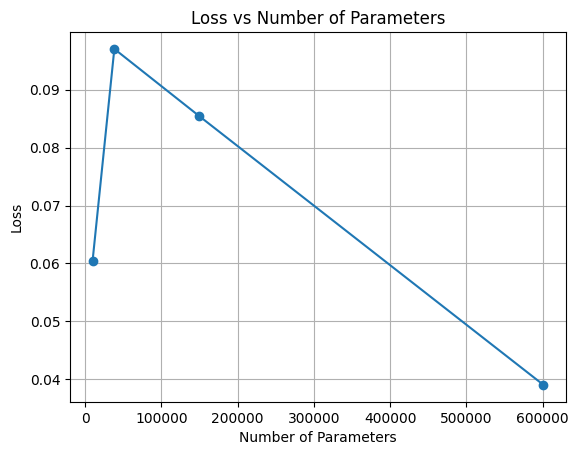

In [4]:
#Q4. Modify CNN of Qn. 3 to reduce the number of parameters in the 
#network. Draw a plot of percentage drop in parameters vs accuracy.
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


# Define the models
class CNNClassifier1(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 128, 3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(128, 256, 3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(256, 128, 3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
        )
        self.classification_head = nn.Sequential(
            nn.Linear(128, 64, bias=True),
            nn.ReLU(),
            nn.Linear(64, 20, bias=True),
            nn.ReLU(),
            nn.Linear(20, 10, bias=True),
        )

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(x.size(0), -1))


class CNNClassifier2(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(64, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
        )
        self.classification_head = nn.Sequential(
            nn.Linear(32, 20, bias=True),
            nn.ReLU(),
            nn.Linear(20, 10, bias=True),
        )

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(x.size(0), -1))


class CNNClassifier3(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
            nn.Conv2d(32, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride=2),
        )
        self.classification_head = nn.Sequential(
            nn.Linear(16, 10, bias=True),
        )

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(x.size(0), -1))


# Load the MNIST dataset
mnist_trainset = datasets.MNIST(root="./data", download=True, train=True, transform=ToTensor())
train_loader = DataLoader(mnist_trainset, batch_size=50, shuffle=True)

mnist_testset = datasets.MNIST(root="./data", download=True, train=False, transform=ToTensor())
test_loader = DataLoader(mnist_testset, batch_size=50, shuffle=True)

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loss function
loss_fn = nn.CrossEntropyLoss()


# Helper function for training the models
def train_model(model, train_loader, optimizer, num_epochs=6):
    model.to(device)
    model.train()
    total_params = sum(param.numel() for param in model.parameters())

    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:
                print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
                running_loss = 0.0

    print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")
    return total_params, loss.item()


# Helper function for testing the models
def test_model(model, test_loader):
    model.to(device)
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy: {100 * correct / total:.2f}%")


# Train and test CNNClassifier1
model1 = CNNClassifier1()
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
print("Training CNNClassifier1:")
params1, loss1 = train_model(model1, train_loader, optimizer1)
test_model(model1, test_loader)

# Train and test CNNClassifier2
model2 = CNNClassifier2()
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)
print("\nTraining CNNClassifier2:")
params2, loss2 = train_model(model2, train_loader, optimizer2)
test_model(model2, test_loader)

# Train and test CNNClassifier3
model3 = CNNClassifier3()
optimizer3 = optim.SGD(model3.parameters(), lr=0.01)
print("\nTraining CNNClassifier3:")
params3, loss3 = train_model(model3, train_loader, optimizer3)
test_model(model3, test_loader)

# Given losses and params
losses = [0.03902818262577057, 0.08542836457490921, 0.09705353528261185, 0.06044217571616173]
params = [601254, 149798, 38150, 9594]

# Plotting the graph
plt.plot(params, losses, marker='o')
plt.xlabel("Number of Parameters")
plt.ylabel("Loss")
plt.title("Loss vs Number of Parameters")
plt.grid(True)
plt.show()